# Practica 2 (Equipo 6)

## Práctica de probabilidad

Se afirma que el 3% de las llamadas a un call center son falsas. Se
toma una muestra de 500 llamadas, e interesa ver los valores
esperados para el número de llamadas falsas.

**1. Señale en este caso quien es la población, la muestra y la variable de interés (X).**
- Poblacion: Todas las llamadas que recibe el Call Center.
- Muestra: Las 500 llamadas seleccionadas para el muestreo.
- X (variable de interes): El numero de llamadas falsas

**2. Explique con sus palabras porque el valor de la variable de interés es aleatorio.**

La variable resulta aleatoria, ya que independientemente de la forma en la que se extraiga la muestra, el valor del numero de llamadas falsas simpre puede variar, y mas en este caso la probabilidad es baja (5%). 

**3. ¿Qué distribución de probabilidad es la candidata a modelar a X? Argumente.**
La distribucion ideal para este caso sería la binomial debido a que tenemes unicamente dos categorias: llamada real y falsa (exito o fracaso). Ademas de esto, el problema nos proporciona los valores ideales para el calculo de una distribucion binomial, en este caso:

- n: número de llamadas
- p: probabilidad de que una llamada sea falsa (3% o 0.03)

**4. ¿Cuál es la media y la desviación estándar de la distribución propuesta?**

**5. Represente gráficamente la función de probabilidad, y señale los aspectos
más importantes en cuanto a tendencia central, variabilidad y forma de la
distribución de X.**

**6. Obtenga un intervalo de probabilidad, [LI, LS] con una cobertura mayor o
igual a 0.95 de probabilidad para los valores de X, es decir P(LI≤ X ≤LS)
≥0.95.**

Media de la muestra: 15.0
Desviación estándar: 3.81444622455213
Limite inferior: 8
Limite superior: 22
q0.025: 8.0
q0.975: 23.0
Cobertura: 0.9653448441814854


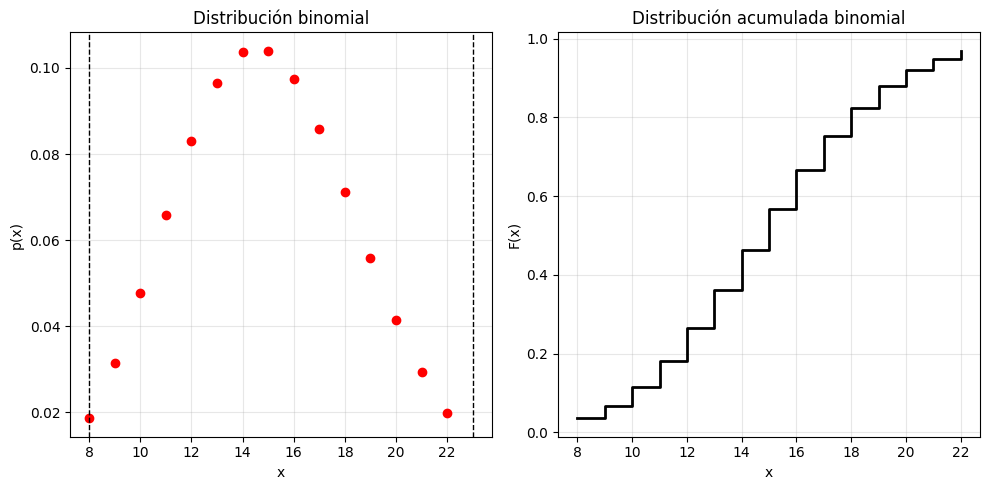

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 500
p = 0.03

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
print(f'Media de la muestra: {mu}')
print(f'Desviación estándar: {sigma}')

# 95% de cobertura
Li = round(max(mu - 1.96*sigma, 0))
Ls = round(mu + 1.96*sigma)
print(f'Limite inferior: {Li}')
print(f'Limite superior: {Ls}')

x = np.arange(Li, Ls + 1, 1)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, binom.pmf(x, n, p), 'ro', markersize=6)
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Distribución binomial')
plt.grid(alpha=0.3)

# Cuantiles
q025 = binom.ppf(0.025, n, p)
q975 = binom.ppf(0.975, n, p)
print(f'q0.025: {q025}')
print(f'q0.975: {q975}')

plt.axvline(x=q025, color='black', linestyle='--', linewidth=1)
plt.axvline(x=q975, color='black', linestyle='--', linewidth=1)

# Cobertura del cuantil
cobertura = binom.cdf(q975, n, p) - binom.cdf(q025 - 1, n, p)
print(f'Cobertura: {cobertura}')

# Gráfica de la acumulada (función escalonada)
plt.subplot(1, 2, 2)
plt.step(x, binom.cdf(x, n, p), where='post', color='black', linewidth=2)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Distribución acumulada binomial')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Despues del análisis de los datos con python podemos observar que la media llamadas falsas en nuestra muestra de 500 llamadas es de tan solo 15 llamadas, con una desviacion estandar de aproximadamente 3.81. En cuanto a la forma de la distribución tenemos que mantiene una forma normal acampanada. En el caso de los cuartiles, se tiene que para el 0.025 tenemos llamadas menores a 8, mientras que apartir de 0.975 las llamadas pueden llegar a ser hasta 23. 

---

## Tiempo de llamadas

También interesa recopilar el tiempo de duración de las
llamadas. Se desea analizar la distribución del tiempo de las
llamadas. De acuerdo a un reporte preliminar se tiene que μ=4
minutos y σ=1 minutos. Bajo el supuesto de distribución normal
obtenga lo siguiente:


**1. Obtenga la densidad normal y señale el tiempo de duración de las llamadas con una cobertura del 95.4%.**

Limite inferior: 2 minutos
Limite superior: 6 minutos


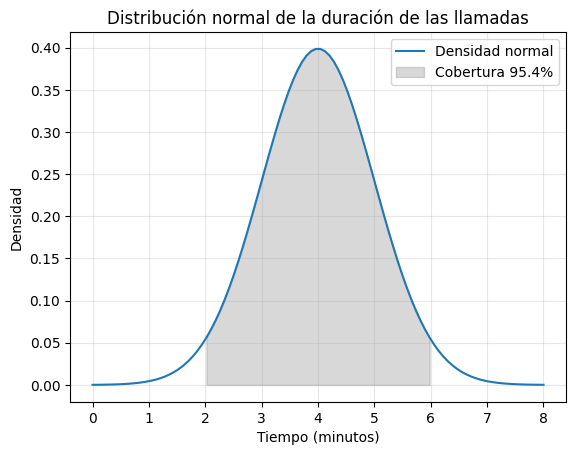

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

mu = 4 # minutos
sigma = 1 # minuto

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)

Li = mu - 2*sigma
Ls = mu + 2*sigma
print(f'Limite inferior: {Li} minutos')
print(f'Limite superior: {Ls} minutos')

plt.plot(x, y, label='Densidad normal')
plt.fill_between(x, y, where=((x >= Li) & (x <= Ls)), color='gray', alpha=0.3, label='Cobertura 95.4%')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Densidad')
plt.title('Distribución normal de la duración de las llamadas')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

De acuerdo a una distribucion normal con media 4 y desviacion estandar 1, podemos ver que para el caso del 95.4% (2 veces Sigma), los limites se encuentran entre 2 a 6 minutos por llamada.

**2. ¿Que tiempo mínimo se espera que dure el 90% de las llamadas?**

In [54]:
q90 = norm.ppf(0.10, mu, sigma)
print(f'Tiempo mínimo: {q90} minutos')

Tiempo mínimo: 2.7184484344553996 minutos


Tomando en cuenta el inverso de 90 (10%) ya que queremos conocer el tiempo minimo utilizando las funciones que python nos provee con la libreria para analisi de distribuciones normales, tenemos que lo minimo esperado para una llamada en este caso seria de casi 3 minutos (2.7).

**3. ¿Cuál es el tiempo máximo que se espera dure el 95% de las llamadas?**

In [55]:
q95 = norm.ppf(0.95, mu, sigma)
print(f'Tiempo mínimo: {q95} minutos')

Tiempo mínimo: 5.644853626951472 minutos


Usando una lógica similar al inciso anterior, tenemos que lo mas que el tiempo maximo esperado de una llamada para el 95% de las llamadas en la muestra es de 5.6 minutos aproximadamente.

**4. Tome una muestra aleatoria del tiempo de las 100 llamadas, y haga un análisis del tiempo. Comente los resultados a la luz de lo esperado.**

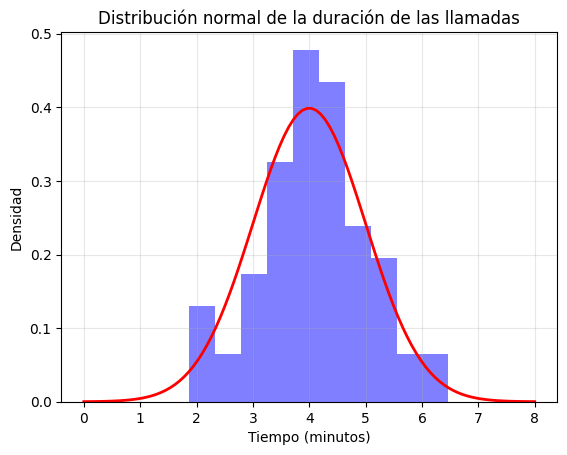

In [42]:
np.random.seed(10)

muestra = np.random.normal(mu, sigma, 100)
plt.hist(muestra, bins=10, density=True, alpha=0.5, color='b', label='Histograma de la muestra')
plt.plot(x, y, 'r-', lw=2, label='Densidad normal teórica')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Densidad')
plt.title('Distribución normal de la duración de las llamadas')
plt.grid(alpha=0.3)
plt.show()

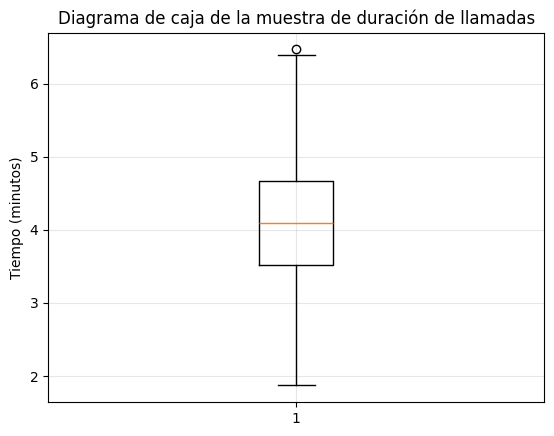

In [49]:
plt.boxplot(muestra)
plt.title('Diagrama de caja de la muestra de duración de llamadas')
plt.ylabel('Tiempo (minutos)')
plt.grid(alpha=0.3)
plt.show()

In [50]:
import scipy.stats as stats

media = np.mean(muestra)
mediana = np.median(muestra)
moda = stats.mode(muestra)
varianza = np.var(muestra)
desviacion = np.std(muestra)
rango = np.max(muestra) - np.min(muestra)

print('Análisis de la muestra:')
print(f'Media: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda.mode}')
print(f'Varianza: {varianza}')
print(f'Desviación estándar: {desviacion}')
print(f'Rango: {rango}')
quantiles = np.percentile(muestra, [25, 50, 75])
print(f'Quantiles (25%, 50%, 75%): {quantiles}')

Análisis de la muestra:
Media: 4.0794166629368735
Mediana: 4.094368414212379
Moda: 1.868287891518396
Varianza: 0.9351653502963495
Desviación estándar: 0.9670394771137057
Rango: 4.599363164916207
Quantiles (25%, 50%, 75%): [3.51609584 4.09436841 4.67221367]


Segun lo generado para nuestra muestra aleatoria con media 4 y deviacion estandar 1, al calcular los valores de su estadistica descriptiva basica, se puede observar que los dos primeramente mencionados se mantienen casi igual, pero con ligeras variaciones. En el cado de la mediana tambien se puede observar que las llamadas suelen durar 4 minutos, y en el caso de nuestra muestra se puede ver que el valor de tiempo que mas se repite por llamada es casi 2 minutos, y por el lado de los cuartiles, estamos entre 3 minutos y medio para el primer cuartil y poco mas de 4 minutos y medio para el segundo.

Con todo esto antes mencionado, se puede concluir que nuestra distribucion generada con media 4 y std 1 si tiene las porpiedades y forma de una distribucion normal.